In [2]:
%load_ext autoreload
%autoreload 2
from wishart import wishart_lib, wishart_lib_stepan
from motifs import motifs
import sys

sys.path.append("..")

from indexes import indexes_lib
from generator import generator_lib
import numpy as np
from matplotlib import pyplot as plt
import importlib
from scipy.interpolate import make_interp_spline, BSpline
from collections import defaultdict
from typing import List

import sys

sys.path.append("..")
importlib.reload(wishart_lib_stepan)
importlib.reload(wishart_lib)
importlib.reload(indexes_lib)
importlib.reload(generator_lib)
importlib.reload(motifs)
from collections import defaultdict
from motifs.motifs import GenerateAllMotifs, GenPatterns
import numpy as np
import pdb
import dill
# from sklearn.datasets.samples_generator import make_blobs
import random
from itertools import combinations, product
from scipy.special import gamma
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform, euclidean
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm
from math import sqrt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score, confusion_matrix, silhouette_score, davies_bouldin_score
import seaborn as sn
from statistics import mean
from wishart.wishart_lib import Wishart
import itertools
import seaborn as sns

def smooth_plot(x, y, plt):
    xnew = np.linspace(x.min(), x.max(), 1000)
    spl = make_interp_spline(x, np.array(y), k=3)
    power_smooth = spl(xnew)
    line, = plt.plot(xnew, power_smooth)
    return line

def load_centers(r=28.0, centers=dict(), suffix=""):
    loaded = np.load(f"centers{suffix}/{r}.npy", allow_pickle=True)
    for k, v in loaded:
        if k not in list(centers.keys()):
            centers[k] = v
        else:
            for el in v:
                centers[k].append(el)

    return centers

def close_motifs(motif1, motif2, eps=0.01):
    dist = np.linalg.norm(motif1 - motif2)
    return dist < eps

In [2]:
horizons = np.array(["1", "1", "1", "10", "10", "10", "50", "50", "50", "100", "100", "100"])
metrics_names = np.array(["NP(%)", "MAE", "RMSE"] * 4)
final_df = pd.DataFrame(data=[], columns=pd.MultiIndex.from_tuples(zip(horizons, metrics_names)))

In [7]:
baseline = np.load("metrics/baseline_table_mean.npy")
r_1 = np.load("metrics/r_1_table_mean.npy")
r_2 = np.load("metrics/r_2_table_mean.npy")
r_3 = np.load("metrics/r_3_table_mean.npy")


horizons = np.array(["1", "1", "1", "10", "10", "10", "50", "50", "50", "100", "100", "100"])
metrics_names = np.array(["NP(%)", "MAE", "RMSE"] * 4)
final_df = pd.DataFrame(data=[], columns=pd.MultiIndex.from_tuples(zip(horizons, metrics_names)))
final_df.loc["baseline"] = baseline
final_df.loc["r_1"] = r_1
final_df.loc["r_2"] = r_2
final_df.loc["r_3"] = r_3

In [8]:
final_df

1                        10                             50  \
         NP(%)       MAE      RMSE NP(%)       MAE      RMSE      NP(%)   
baseline   0.0  0.004000  0.006000   0.0  0.033000  0.064000  26.000000   
r_1        0.0  0.012611  0.012611   5.0  0.029222  0.039333  19.333333   
r_2        0.0  0.019837  0.019837   0.0  0.040556  0.053608   3.071895   
r_3        0.0  0.020859  0.020859   0.0  0.038789  0.051137   1.762255   

                                    100                      
               MAE      RMSE      NP(%)       MAE      RMSE  
baseline  0.121000  0.205000  62.000000  0.134000  0.228000  
r_1       0.149278  0.204056  37.111111  0.179944  0.230500  
r_2       0.163804  0.214209   9.653595  0.201386  0.251085  
r_3       0.163319  0.213304   5.685049  0.202333  0.251308

In [9]:
h = 100

In [21]:
rmse_baseline = np.load("metrics/rmse_baseline.npy")
rmse_1 = np.load("metrics/rmse_1.npy")
rmse_2 = np.load("metrics/rmse_2.npy")
rmse_3 = np.load("metrics/rmse_3.npy")

bad_baseline = np.load("metrics/bad_baseline.npy")
bad_1 = np.load("metrics/bad_1.npy")
bad_2 = np.load("metrics/bad_2.npy")
bad_3 = np.load("metrics/bad_3.npy")

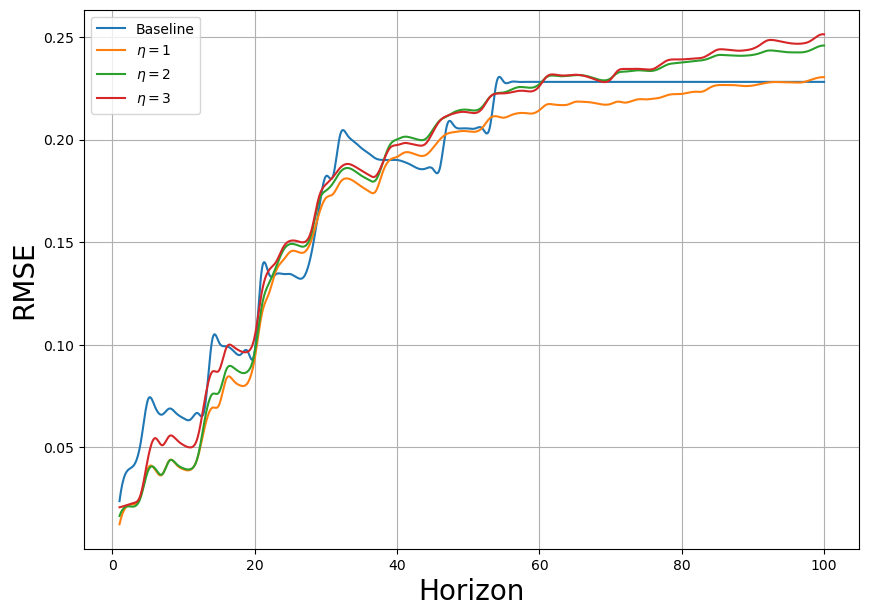

In [22]:
plt.figure(figsize=(10, 7))
smooth_plot(np.array(range(1, h + 1)), np.array(rmse_baseline), plt).set_label("Baseline")
smooth_plot(np.array(range(1, h + 1)), np.array(rmse_1.mean(axis=0)), plt).set_label(r"$\eta=1$")
smooth_plot(np.array(range(1, h + 1)), np.array(rmse_2.mean(axis=0)), plt).set_label(r"$\eta=2$")
smooth_plot(np.array(range(1, h + 1)), np.array(rmse_3.mean(axis=0)), plt).set_label(r"$\eta=3$")

plt.grid()
plt.legend()
plt.xlabel("Horizon", size=20)
plt.ylabel("RMSE", size=20)
plt.show()


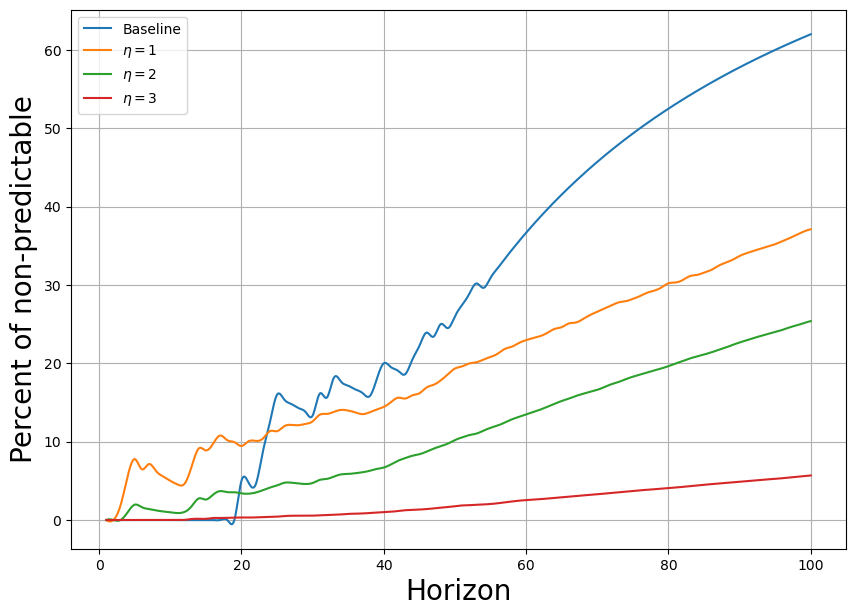

In [23]:
plt.figure(figsize=(10, 7))
smooth_plot(np.array(range(1, h + 1)), np.array(bad_baseline), plt).set_label("Baseline")
smooth_plot(np.array(range(1, h + 1)), np.array(bad_1.mean(axis=0)), plt).set_label(r"$\eta=1$")
smooth_plot(np.array(range(1, h + 1)), np.array(bad_2.mean(axis=0)), plt).set_label(r"$\eta=2$")
smooth_plot(np.array(range(1, h + 1)), np.array(bad_3.mean(axis=0)), plt).set_label(r"$\eta=3$")

plt.grid()
plt.legend()
plt.xlabel("Horizon", size=20)
plt.ylabel("Percent of non-predictable", size=20)
plt.show()
